Hui Qi. 2023.4.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ("combine_add_geo.csv")
df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,...,Covid Tests,Covid Vaccinations,Image Caption,Detected Objects,tika_language,google_language,rtg_translate,geo_name,long,lat
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 19:39,...,0.0,16637213.0,a sign that is on the side of a building .,"['street sign', 'scoreboard']",en,en,Qatar Airways has withdrawn flights from 18 de...,NaN,NaN,NaN
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022/10/16 23:31,...,0.0,12556239.0,a collage of photos of a person holding a pair...,"['envelope', 'menu']",en,en,Positive thinking does not necessarily mean av...,NaN,NaN,NaN
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 18:04,...,0.0,16637213.0,a red and white fire hydrant sitting on top of...,"['book jacket, dust cover, dust jacket, dust w...",en,en,FIFA's president sought Monday to dispell ling...,"['South Africa', 'Gulf County']","['24.0', '-85.26101']","['-29.0', '29.90862']"
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 20:27,...,0.0,16637213.0,a tennis court with a tennis racket and a ball,"['dome', 'mosque']",en,en,Ticket sales for the FIFA World Cup Qatar 2022...,['United Arab Emirates'],['54.5'],['23.75']
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\r\n<p dir=""ltr"">Almost all o...",https://image.pixstory.com/Pixstory-image-1666...,2021/9/27 13:00,...,7878605.0,132857432.0,a piece of chocolate cake sitting on top of a ...,"['ice cream, icecream', 'dough']",en,en,"\r\nAlmost all of us is a fan of ice creams, f...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,69290,STY1642159740,21189,USR1642158120,NaN,21,Bts,Bts j hope,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:32,...,12939335.0,109788076.0,a woman is taking a picture of herself in a mi...,"['brassiere, bra, bandeau', 'hair spray']",nl,nl,i hope,NaN,NaN,NaN
94996,69289,STY1642159721,21194,USR1642158805,female,18,I LOVE SHARK TANK INDIA,It's breathe of fresh air in a polluted enviro...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:43,...,12939335.0,109788076.0,a man holding a frisbee in his hands .,"['web site, website, internet site, site', 'pi...",en,en,It's breathe of fresh air in a polluted enviro...,NaN,NaN,NaN
94997,69288,STY1642159611,21203,USR1642159306,NaN,21,Patanjali-Good for health.,I use this Ayurveda product for boosting my im...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:51,...,12939335.0,109788076.0,a red and white fire hydrant sitting in the mi...,"['pill bottle', 'lotion']",en,en,I use this Ayurveda product for boosting my im...,NaN,NaN,NaN
94998,69287,STY1642159601,21202,USR1642159269,NaN,22,Football League,Me and my friend playing football inside our c...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:51,...,12939335.0,109788076.0,a group of people standing on top of a lush gr...,['croquet ball'],en,en,Me and my friend playing football inside our c...,NaN,NaN,NaN


In [3]:
print(df.columns)

Index(['Story Primary ID', 'Story ID', 'User Primary ID', 'User ID', 'Gender',
       'Age', 'Title', 'Narrative', 'Media', 'Account Created Date',
       'Interest', 'ifHate', 'ifSarcasm', 'Film', 'Sport', 'Postive Words 1',
       'Postive Words 2', 'Postive Words 3', 'Europe Holiday',
       'Americas Holiday', 'Asia Holiday', 'Africa Holiday', 'Oceania Holiday',
       'Public Holiday Or Not', 'Covid Cases', 'Covid Deaths', 'Covid Tests',
       'Covid Vaccinations', 'Image Caption', 'Detected Objects',
       'tika_language', 'google_language', 'rtg_translate', 'geo_name', 'long',
       'lat'],
      dtype='object')


## Gender & GeoTopic

### Are there any age or gender or topic based correlations by location in the posts?

In [4]:
# gender & location

# remove gender column with nan 
gender_df = df[df['Gender'].notnull()]
gender_df

# reindex after removing nan rows
# https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe
gender_df.set_axis(range(len(gender_df)), inplace=True)
gender_df


,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,...,Covid Tests,Covid Vaccinations,Image Caption,Detected Objects,tika_language,google_language,rtg_translate,geo_name,long,lat
0,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\r\n<p dir=""ltr"">Almost all o...",https://image.pixstory.com/Pixstory-image-1666...,2021/9/27 13:00,...,7878605.0,132857432.0,a piece of chocolate cake sitting on top of a ...,"['ice cream, icecream', 'dough']",en,en,"\r\nAlmost all of us is a fan of ice creams, f...",NaN,NaN,NaN
1,156575,STY1666111408,9266,USR1632906744,others,23,Challenging stigma associated with mental illn...,"<p dir=""ltr"">Everyone has a role to play in cr...",https://image.pixstory.com/Pixstory-image-1666...,2021/9/29 14:42,...,9877253.0,138043039.0,a close up of a sign on a building,"['plastic bag', 'book jacket, dust cover, dust...",en,en,Everyone has a role to play in creating a ment...,NaN,NaN,NaN
2,156574,STY1666111226,29389,USR1648142221,male,20,Photos : Of the 12 Staples Every French Woman ...,"<p dir=""ltr"">Here are the 12 basic clothing it...",https://image.pixstory.com/Pixstory-image-1666...,2022/3/24 22:47,...,6889742.0,65856184.0,a woman sitting on a bench talking on a cell p...,"['jean, blue jean, denim', 'sunglasses, dark g...",en,en,Here are the 12 basic clothing items every Fre...,NaN,NaN,NaN
3,156573,STY1666111207,11447,USR1637905680,female,22,“Everybody from Starland Was There”: The Holly...,"<p dir=""ltr"">Remembering the Oct. 18, 1922 ope...",https://image.pixstory.com/Pixstory-image-1666...,2021/11/26 11:18,...,8937805.0,158875431.0,a group of people riding horses down a street .,"['pickelhaube', 'military uniform']",en,en,"Remembering the Oct. 18, 1922 opening night of...","['Hollywood', 'Los Angeles']","['-80.14949', '-118.24368']","['26.0112', '34.05223']"
4,156570,STY1666111026,57711,USR1657793493,female,38,Manchester United have a decision to make on S...,"<p dir=""ltr"">OPINIONManchester United have a d...",https://image.pixstory.com/Pixstory-image-1666...,2022/7/14 15:41,...,0.0,36560781.0,a young man holding a tennis racquet on a tenn...,"['torch', 'jersey, T-shirt, tee shirt']",en,en,OPINIONManchester United have a decision to ma...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,69300,STY1642160333,11460,USR1637921462,male,36,Mario Rui (Napoli) riabbraccia i figli dopo il...,Mario Rui può tornare a disposizione di Lucian...,https://image.pixstory.com/Pixstory-image-1642...,2021/11/26 15:41,...,8937805.0,158875431.0,a group of people standing in a room .,"['library', 'bookshop, bookstore, bookstall']",it,it,mario rui can return to Luciano spalletti and ...,NaN,NaN,NaN
44934,69294,STY1642159998,11822,USR1638352763,male,21,Taking the modelling and content creation worl...,It is wonderful to know about all those wonder...,https://image.pixstory.com/Pixstory-image-1642...,2021/12/1 15:29,...,10294010.0,167851400.0,a woman is holding a cell phone in her hand .,"['hair spray', 'perfume, essence']",en,en,It is wonderful to know about all those wonder...,NaN,NaN,NaN
44935,69293,STY1642159982,11835,USR1638362514,male,12,উত্তৰ প্ৰদেশ বিধানসভা নিৰ্বাচনত বিজেপিয়ে মাত্...,দেশৰ পাঁচ খন ৰাজ্যৰ বিধানসভা নিৰ্বাচন সমগাত। ব...,https://image.pixstory.com/Pixstory-image-1642...,2021/12/1 18:11,...,10294010.0,167851400.0,a man holding a cell phone up to his ear .,"['whistle', 'stethoscope']",bn,bn,There are five state legislatures in the count...,NaN,NaN,NaN
44936,69292,STY1642159945,11822,USR1638352763,male,21,"Bomb recovered in Delhi market, NSG defuses IE...",A major tragedy was averted in Delhi after the...,https://image.pixstory.com/Pixstory-image-1642...,2021/12/1 15:29,...,10294010.0,167851400.0,a group of men standing next to each other .,"['military uniform', 'pickelhaube']",en,en,A major tragedy was averted in Delhi after the.

In [5]:
gender_df.to_dict('series')['geo_name'][3]

"['Hollywood', 'Los Angeles']"

In [6]:
geo_gender_dic ={}
for i in range(len(gender_df)):
    gender = gender_df["Gender"][i]
    
    # check if geo_name column has geolocation names
    if pd.isnull(gender_df['geo_name'][i])==False   :
        geo_infomration = gender_df['geo_name'][i]
        geo_infomration = geo_infomration[2:-2]
        geo_infomration = geo_infomration.replace('\'',"")
        geo_name = geo_infomration.split(",") # a list of goe_names in each row
        for name in geo_name:
            name = name.strip()
            #print(name)
            
            
            if name not in geo_gender_dic:
                #print(i)
                #print(gender)
                geo_gender_dic[name] = {}
                geo_gender_dic[name][gender] = geo_gender_dic[name].get(gender, 0) + 1
            else:
                geo_gender_dic[name][gender] = geo_gender_dic[name].get(gender, 0) + 1
        #print(geo_infomration)
        #print(geo_name)
#print(geo_gender_dic)

In [7]:
df_geo_gender = pd.DataFrame.from_dict(geo_gender_dic)

df_geo_gender = df_geo_gender.replace(np.nan, 0)
df_geo_gender

,Hollywood,Los Angeles,Bangladesh,New York City,New York,Batman,Kingdom of Spain,People’s Republic of China,Redstone Arsenal,Leeds,...,Managua,Austrian Legation Building,King’s Mills,Shaanxi,Idukki,Lee Dam Center for Fine Art,Doom,Jhansi,Mon State,Eight Ash Green
female,83,38,12,22,43,2.0,14,57,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
male,96,46,142,26,99,0.0,191,187,17.0,8.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
others,30,95,21,21,66,0.0,30,52,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [8]:
# fine the top 15 geolocations that are mentioned by users in their narratives
geo_gender_index_top15 = df_geo_gender.sum(axis = 0).sort_values(ascending=False).head(15).index
geo_gender_index_top15 = list(geo_gender_index_top15)
geo_gender_index_top15

['British Indian Ocean Territory',
 'Manchester',
 'Islamic Republic of Afghanistan',
 'Delhi',
 'Paris',
 'Town of Italy',
 'United States',
 'Islamic Republic of Pakistan',
 'Russian Federation',
 'Madrid',
 'Europe',
 'England',
 'London',
 'Republic of France',
 'Commonwealth of Australia']

In [9]:
df_geo_gender_2 = pd.DataFrame(df_geo_gender, columns =geo_gender_index_top15)

df_geo_gender_2

,British Indian Ocean Territory,Manchester,Islamic Republic of Afghanistan,Delhi,Paris,Town of Italy,United States,Islamic Republic of Pakistan,Russian Federation,Madrid,Europe,England,London,Republic of France,Commonwealth of Australia
female,551,44,599,110,81,41,123,89,90,17,80,55,67,62,117
male,1385,935,186,337,284,449,307,257,316,356,293,325,282,231,194
others,696,32,153,200,143,16,71,129,37,41,35,17,23,53,27


In [10]:
df_geo_gender_3 = df_geo_gender_2.T
df_geo_gender_3

,female,male,others
British Indian Ocean Territory,551,1385,696
Manchester,44,935,32
Islamic Republic of Afghanistan,599,186,153
Delhi,110,337,200
Paris,81,284,143
Town of Italy,41,449,16
United States,123,307,71
Islamic Republic of Pakistan,89,257,129
Russian Federation,90,316,37
Madrid,17,356,41


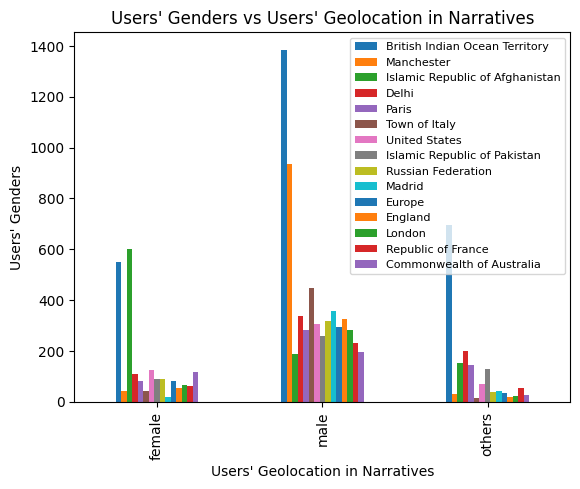

In [11]:
# draw a bar char for the top 15 geolocations with the 3 gender groups
df_geo_gender_2.plot(kind="bar")
plt.title("Users' Genders vs Users' Geolocation in Narratives")
plt.xlabel("Users' Geolocation in Narratives")
plt.ylabel("Users' Genders")
plt.legend(prop={'size': 8})
plt.savefig('geotopics vs genders fig2.png')
plt.show()



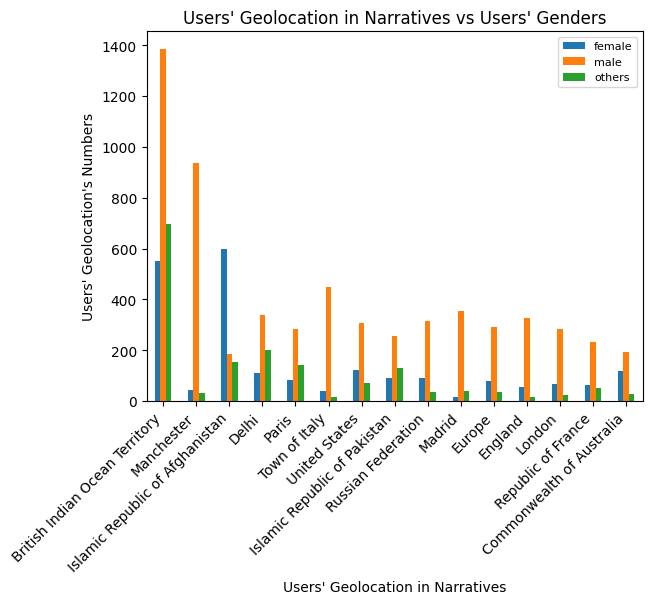

'\ncosidering that the users of this app have more male than female, it is reasonable that for each geo location, \nthe user\'s gender distribution have more male than female.\nHowever, notice that we have more female users mention "Islamic Republic of Afghanistan" in their posts.  \nIt is a very interesting and essential research question. Is it becasue that female users in the world \nconcern and care female\'s status, rights, and freedom under Islamic Republic of Afghanistan? \n\nAlso, notice that posts mention Manchester are almosty came from males. Females and other gender nearly do not \nmention this city....Is there any reason for this situation? Could it realte to any sport games?\n\n'

In [12]:
# draw a bar char for the top 15 geolocations with the 3 gender groups
df_geo_gender_3.plot(kind="bar")
plt.title("Users' Geolocation in Narratives vs Users' Genders")
plt.xlabel("Users' Geolocation in Narratives")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Users' Geolocation's Numbers")
plt.legend(prop={'size': 8})
plt.savefig('geotopics vs genders.png')
plt.show()

'''
cosidering that the users of this app have more male than female, it is reasonable that for each geo location, 
the user's gender distribution have more male than female.
However, notice that we have more female users mention "Islamic Republic of Afghanistan" in their posts.  
It is a very interesting and essential research question. Is it becasue that female users in the world 
concern and care female's status, rights, and freedom under Islamic Republic of Afghanistan? 

Also, notice that posts mention Manchester are almosty came from males. Females and other gender nearly do not 
mention this city....Is there any reason for this situation? Could it realte to any sport games?

'''

In [13]:
# see posts that have Islamic Republic of Afghanistan




for i in range(0,3000):
    gender = gender_df["Gender"][i]
    
    # check if geo_name column has geolocation names
    if pd.isnull(gender_df['geo_name'][i])==False   :
        geo_infomration = gender_df['geo_name'][i]
        geo_infomration = geo_infomration[2:-2]
        geo_infomration = geo_infomration.replace('\'',"")
        geo_name = geo_infomration.split(",") # a list of goe_names in each row
        for name in geo_name:
            name = name.strip()
            #print(name)
            if name =="Islamic Republic of Afghanistan":
                print(gender_df['rtg_translate'][i],'\n')
            

        #print(geo_infomration)
        #print(geo_name)

The Challenges to Nation-Building 
in Afghanistan continues......
Most of the major formal social, administrative and economic institutions of the country had fallen apart due to the conflict over Soviet occupation until the Geneva Accords (1979-1989) and continued heavy fighting among various mujahidden factions from 1992 which continued till the late 1990s. The nation s transportation and communication systems, heavy and small-scale industries, education and agricultural infrastructure were among the most seriously damaged sectors that needed a tremendous amount of investment. This economic decline had exacerbated the level of poverty and economic hardship throughout the country. Largely dependent on subsistence agriculture, the country has witnessed diminishing income levels, declining food security, reduced access to urgently needed services and an increasing population. 
The Office of the UN Coordinator for Afghanistan has highlighted  
some of the problematic trends of the Afghan

In [14]:
'''
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
print(df_geo_gender_2.items())

for geo_name, geo_count in df_geo_gender_2.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')
ax1 = df_geo_gender_2.plot(kind="bar")
ax1.set_title('Sharing Y axis')
ax2 = 
plt.show()
'''

'\n# Create two subplots and unpack the output array immediately\nf, (ax1, ax2) = plt.subplots(1, 2, sharey=True)\nprint(df_geo_gender_2.items())\n\nfor geo_name, geo_count in df_geo_gender_2.items():\n    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)\n    bottom += sex_count\n\n    ax.bar_label(p, label_type=\'center\')\nax1 = df_geo_gender_2.plot(kind="bar")\nax1.set_title(\'Sharing Y axis\')\nax2 = \nplt.show()\n'

## Age & GeoTopic

#### child : age from 5 to 14
#### youth : age from 15 to 24
#### adult : age from 25 to 64
#### senior : age from 65 to 100
#### ages larger than 100 are dropped, agaes lower than 5 are dropped

In [15]:
# create a dictionary to collect each user's age with values on interest tags 
geo_age_dic ={}


for i in range(len(df)):
    age = df["Age"][i]

    # check if geo_name column has geolocation names
    if pd.isnull(df['geo_name'][i])==False   :
        geo_infomration = df['geo_name'][i]
        geo_infomration = geo_infomration[2:-2]
        geo_infomration = geo_infomration.replace('\'',"")
        geo_name = geo_infomration.split(",") # a list of goe_names in each row
        for name in geo_name:
            name = name.strip()
            
            # ages larger than 100 are dropped, agaes lower than 5 are dropped
            age = int(age)
            if (5<= age) and  (age<=14):
                label = "child"
            elif (15<= age) and  (age<=24):
                label = "youth"
            elif (25<= age) and  (age<=64):
                label = "adult"
            elif (65<= age) and  (age<=100):
                label = "senior"
            else:
                continue
        
            if label not in geo_age_dic:
                geo_age_dic[label] = {}
                geo_age_dic[label][name] = geo_age_dic[label].get(name, 0) + 1
            else:
                geo_age_dic[label][name] = geo_age_dic[label].get(name, 0) + 1
        #print(geo_age_dic)
#print(geo_age_dic)



In [16]:
df_geo_age = pd.DataFrame.from_dict(geo_age_dic)

df_geo_age = df_geo_age.replace(np.nan, 0)
df_geo_age

,child,youth,adult,senior
South Africa,27.0,216.0,102.0,2.0
Gulf County,19.0,17.0,6.0,0.0
United Arab Emirates,16.0,24.0,5.0,0.0
Islamic Republic of Afghanistan,230.0,644.0,129.0,0.0
Parwan,1.0,1.0,0.0,0.0
...,...,...,...,...
Şabāḩ as Sālim,0.0,0.0,0.0,2.0
Miyazaki,0.0,0.0,0.0,1.0
Bada Barabīl,0.0,0.0,0.0,1.0
Shankar Chandra,0.0,0.0,0.0,1.0


In [17]:
df_geo_age.sum(axis = 1).sort_values(ascending=False).head(15)

British Indian Ocean Territory                          3906.0
Manchester                                              1431.0
Islamic Republic of Afghanistan                         1003.0
Delhi                                                    966.0
United States                                            939.0
Commonwealth of Australia                                757.0
Paris                                                    717.0
Russian Federation                                       707.0
Town of Italy                                            692.0
Europe                                                   671.0
England                                                  651.0
Madrid                                                   591.0
United Kingdom of Great Britain and Northern Ireland     587.0
Islamic Republic of Pakistan                             586.0
People’s Republic of China                               575.0
dtype: float64

In [18]:
index_top15 = df_geo_age.sum(axis = 1).sort_values(ascending=False).head(15).index
index_top15_list = list(index_top15)
index_top15_list

['British Indian Ocean Territory',
 'Manchester',
 'Islamic Republic of Afghanistan',
 'Delhi',
 'United States',
 'Commonwealth of Australia',
 'Paris',
 'Russian Federation',
 'Town of Italy',
 'Europe',
 'England',
 'Madrid',
 'United Kingdom of Great Britain and Northern Ireland',
 'Islamic Republic of Pakistan',
 'People’s Republic of China']

In [19]:
df_age_2 = pd.DataFrame(df_geo_age, index =index_top15_list)

df_age_2

,child,youth,adult,senior
British Indian Ocean Territory,888.0,1910.0,1022.0,86.0
Manchester,15.0,563.0,850.0,3.0
Islamic Republic of Afghanistan,230.0,644.0,129.0,0.0
Delhi,208.0,526.0,197.0,35.0
United States,182.0,389.0,365.0,3.0
Commonwealth of Australia,208.0,283.0,266.0,0.0
Paris,31.0,292.0,393.0,1.0
Russian Federation,103.0,325.0,278.0,1.0
Town of Italy,15.0,187.0,490.0,0.0
Europe,58.0,283.0,323.0,7.0


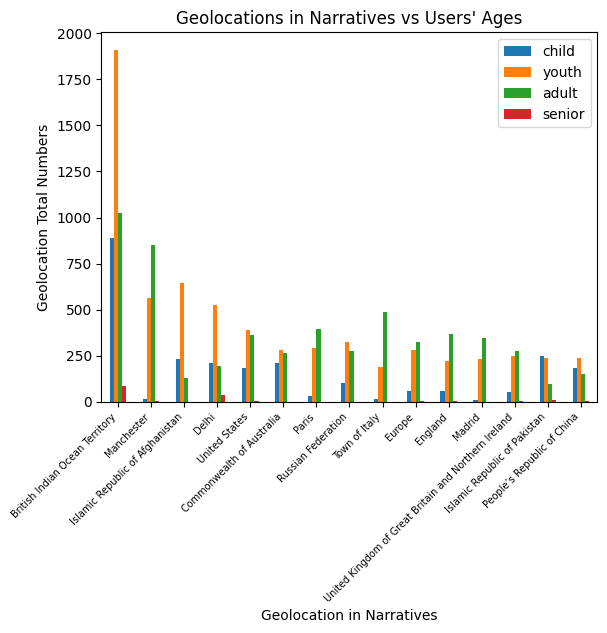

In [20]:
# draw a bar char for the top 15 interest tags with the 4 age groups
df_age_2.plot(kind="bar")
plt.title("Geolocations in Narratives vs Users' Ages")
plt.xlabel("Geolocation in Narratives")
plt.xticks(fontsize=7)
plt.xticks(rotation=45, ha='right')

plt.ylabel("Geolocation Total Numbers")
plt.legend(prop={'size': 10})
plt.savefig('geotopics vs ages.png')
plt.show()


## Interest Topics & Geotopics

In [21]:
# create a dictionary to collect each user's interest tags if the user mentions any locations in narratives
geo_interest_dic ={}
for i in range(len(df)):
    
    if pd.isnull(df['geo_name'][i])==False   :
        geo_infomration = df['geo_name'][i]
        geo_infomration = geo_infomration[2:-2]
        geo_infomration = geo_infomration.replace('\'',"")
        geo_name = geo_infomration.split(",") # a list of goe_names in each row
        
        # check if the geoname is in the dic, then check if the interest is in the dic's keys
        
        for name in geo_name:
            name = name.strip()
            #print(name)
            
            if name in geo_interest_dic:
                #print(name)
                for element in df["Interest"][i].split(","):
                    element = element.strip()
                    element = element.replace("#","")
                    #print(element)
                    geo_interest_dic[name][element] = geo_interest_dic[name].get(element, 0) + 1
                    #print(geo_interest_dic)
            else:
                geo_interest_dic[name] = {}
                
                for element in df["Interest"][i].split(","):
                    element = element.strip()
                    element = element.replace("#","")
                    #print(element)
                    geo_interest_dic[name][element] = geo_interest_dic[name].get(element, 0) + 1
            
                    #print(geo_interest_dic)
    
 
        #print(age_interest_dic)
print(geo_interest_dic)

{'South Africa': {'Technology': 55, 'History': 59, 'Food': 56, 'Entertainment': 65, 'Sports': 90, 'Environment': 57, 'Science': 57, 'Inequality': 57, 'Education': 56, 'Health': 64, 'Politics': 58, 'Economy': 56, 'Climate change': 54, 'saudi arabia football': 1, 'indian football': 7, 'fifa': 9, 'afc': 2, 'football': 27, 'argentina': 1, 'lionelmessi': 1, 'worldcup': 1, 'hollywood': 2, 'actor': 1, 'black actor': 1, 'hollywood black actor': 1, 'thuso mbedu': 1, 'viola davis': 1, 'soccer': 7, 'indonesia': 1, 'bts jin': 1, 'world wide handsome': 1, 'national son in law': 1, 'cricket': 29, 'jhulan goswami': 1, 'indian': 1, 'bollywood': 5, 'bollywood style': 3, 'bollywood life': 3, 'bollywood news': 3, 'bollywood movies': 3, 'the conversation': 81, 'brahmastra': 1, 'brahmastra promotions': 1, 'brahmastra review': 1, 'bollywood legend': 1, 'bollywood celebrities': 1, 'bollywood movie': 3, 'bollywoodl': 1, 'bollywoodmusic': 1, 'bolly': 1, 'mumbai indians': 1, 'south africa': 12, 'fishing tournam

In [22]:
geo_interest_df = pd.DataFrame.from_dict(geo_interest_dic)

geo_interest_df = geo_interest_df.replace(np.nan, 0)
geo_interest_df

,South Africa,Gulf County,United Arab Emirates,Hollywood,Los Angeles,Rocky Mount,Bangladesh,New York City,New York,Batman,...,Austrian Legation Building,King’s Mills,Shaanxi,Idukki,Scandinavia,Lee Dam Center for Fine Art,Doom,Mon State,Eight Ash Green,Lasudiya Surajmal
Technology,55.0,20.0,17.0,82.0,26.0,2.0,20.0,13.0,35.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
History,59.0,20.0,17.0,82.0,26.0,2.0,21.0,15.0,39.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Food,56.0,20.0,17.0,81.0,26.0,2.0,21.0,15.0,36.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Entertainment,65.0,21.0,17.0,138.0,43.0,4.0,20.0,19.0,49.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Sports,90.0,21.0,17.0,84.0,46.0,2.0,25.0,14.0,40.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
punjab elections 2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fantasy drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
weekend series,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
nagaland politics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# 17003 interests × 3534 locations

In [24]:
# find the top 15 geolocations mentions 
geo_index_top15 = geo_interest_df.sum(axis = 0).sort_values(ascending=False).head(15).index
geo_index_top15 = list(geo_index_top15)
geo_index_top15

['British Indian Ocean Territory',
 'Manchester',
 'Delhi',
 'Islamic Republic of Afghanistan',
 'Paris',
 'United States',
 'Russian Federation',
 'Madrid',
 'England',
 'Europe',
 'United Kingdom of Great Britain and Northern Ireland',
 'London',
 'Manchester City Centre',
 'Commonwealth of Australia',
 'Islamic Republic of Pakistan']

In [25]:
df_geo_interest_2 = pd.DataFrame(geo_interest_df, columns = geo_index_top15)

df_geo_interest_2

,British Indian Ocean Territory,Manchester,Delhi,Islamic Republic of Afghanistan,Paris,United States,Russian Federation,Madrid,England,Europe,United Kingdom of Great Britain and Northern Ireland,London,Manchester City Centre,Commonwealth of Australia,Islamic Republic of Pakistan
Technology,743.0,121.0,207.0,95.0,81.0,91.0,52.0,47.0,73.0,50.0,93.0,86.0,32.0,92.0,92.0
History,764.0,122.0,210.0,96.0,88.0,101.0,53.0,47.0,73.0,57.0,106.0,93.0,32.0,93.0,95.0
Food,742.0,120.0,221.0,111.0,84.0,90.0,53.0,48.0,76.0,54.0,96.0,89.0,32.0,120.0,92.0
Entertainment,780.0,168.0,213.0,96.0,110.0,102.0,51.0,57.0,80.0,59.0,105.0,98.0,39.0,100.0,100.0
Sports,939.0,453.0,225.0,104.0,198.0,128.0,89.0,134.0,187.0,102.0,144.0,124.0,118.0,211.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
punjab elections 2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fantasy drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weekend series,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nagaland politics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# find the top 15 interests 
interest_index_top15 = df_geo_interest_2.sum(axis = 1).sort_values(ascending=False).head(15).index
interest_index_top15 = list(interest_index_top15)
interest_index_top15

['Sports',
 'football',
 'Politics',
 'Entertainment',
 'Health',
 'Education',
 'History',
 'Food',
 'Inequality',
 'Environment',
 'Technology',
 'Economy',
 'Science',
 'Climate change',
 'news']

In [27]:
df_geo_interest_3 = pd.DataFrame(df_geo_interest_2, index = interest_index_top15)

df_geo_interest_3

,British Indian Ocean Territory,Manchester,Delhi,Islamic Republic of Afghanistan,Paris,United States,Russian Federation,Madrid,England,Europe,United Kingdom of Great Britain and Northern Ireland,London,Manchester City Centre,Commonwealth of Australia,Islamic Republic of Pakistan
Sports,939.0,453.0,225.0,104.0,198.0,128.0,89.0,134.0,187.0,102.0,144.0,124.0,118.0,211.0,123.0
football,111.0,983.0,11.0,1.0,333.0,39.0,39.0,368.0,278.0,164.0,154.0,166.0,350.0,29.0,2.0
Politics,810.0,120.0,250.0,123.0,88.0,179.0,103.0,48.0,71.0,64.0,106.0,87.0,32.0,161.0,124.0
Entertainment,780.0,168.0,213.0,96.0,110.0,102.0,51.0,57.0,80.0,59.0,105.0,98.0,39.0,100.0,100.0
Health,795.0,121.0,224.0,102.0,81.0,99.0,53.0,47.0,75.0,66.0,101.0,86.0,32.0,98.0,94.0
Education,770.0,120.0,210.0,138.0,83.0,92.0,50.0,47.0,73.0,51.0,97.0,87.0,32.0,93.0,94.0
History,764.0,122.0,210.0,96.0,88.0,101.0,53.0,47.0,73.0,57.0,106.0,93.0,32.0,93.0,95.0
Food,742.0,120.0,221.0,111.0,84.0,90.0,53.0,48.0,76.0,54.0,96.0,89.0,32.0,120.0,92.0
Inequality,750.0,120.0,207.0,95.0,81.0,93.0,53.0,47.0,73.0,50.0,95.0,87.0,32.0,91.0,94.0
Environment,742.0,120.0,210.0,98.0,85.0,88.0,50.0,47.0,73.0,50.0,94.0,86.0,32.0,94.0,95.0


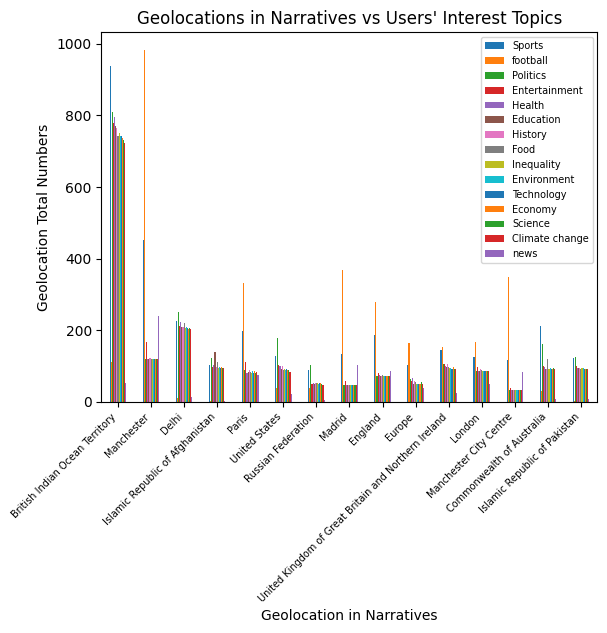

In [28]:
df_geo_interest_3.T.plot(kind="bar")
plt.title("Geolocations in Narratives vs Users' Interest Topics")
plt.xlabel("Geolocation in Narratives")
plt.xticks(fontsize=7)
plt.xticks(rotation=45, ha='right')

plt.ylabel("Geolocation Total Numbers")
plt.legend(prop={'size':7})
plt.savefig('geolocation vs interest.png')
plt.show()

In [29]:
#df_geo_interest_3.corr() not work well

,British Indian Ocean Territory,Manchester,Delhi,Islamic Republic of Afghanistan,Paris,United States,Russian Federation,Madrid,England,Europe,United Kingdom of Great Britain and Northern Ireland,London,Manchester City Centre,Commonwealth of Australia,Islamic Republic of Pakistan
British Indian Ocean Territory,1.000000,-0.590470,0.982581,0.940135,-0.435712,0.793618,0.710125,-0.661175,-0.465132,-0.357272,0.285135,-0.116805,-0.653172,0.814589,0.982023
Manchester,-0.590470,1.000000,-0.682892,-0.667773,0.982150,-0.376532,-0.096812,0.993133,0.985130,0.951722,0.579599,0.846321,0.993373,-0.215610,-0.614143
Delhi,0.982581,-0.682892,1.000000,0.959990,-0.539442,0.813606,0.692870,-0.737553,-0.576393,-0.450849,0.183623,-0.221373,-0.730193,0.764389,0.979865
Islamic Republic of Afghanistan,0.940135,-0.667773,0.959990,1.000000,-0.533147,0.774150,0.653563,-0.715263,-0.568495,-0.451992,0.162603,-0.226501,-0.707923,0.718586,0.933768
Paris,-0.435712,0.982150,-0.539442,-0.533147,1.000000,-0.241158,0.047104,0.960707,0.989194,0.981513,0.717478,0.926688,0.962629,-0.070408,-0.465816
United States,0.793618,-0.376532,0.813606,0.774150,-0.241158,1.000000,0.944634,-0.434556,-0.278283,-0.135745,0.348494,-0.007994,-0.429909,0.862346,0.873027
Russian Federation,0.710125,-0.096812,0.692870,0.653563,0.047104,0.944634,1.000000,-0.167916,0.019745,0.147283,0.576995,0.265395,-0.161308,0.907320,0.778197
Madrid,-0.661175,0.993133,-0.737553,-0.715263,0.960707,-0.434556,-0.167916,1.000000,0.959608,0.930249,0.519663,0.810873,0.999862,-0.311916,-0.683468
England,-0.465132,0.985130,-0.576393,-0.568495,0.989194,-0.278283,0.019745,0.959608,1.000000,0.965674,0.663865,0.883373,0.961055,-0.062740,-0.493147
Europe,-0.357272,0.951722,-0.450849,-0.451992,0.981513,-0.135745,0.147283,0.930249,0.965674,1.000000,0.776754,0.943176,0.933735,-0.001613,-0.388115
